<a href="https://colab.research.google.com/github/isababale/My-Documents-/blob/main/CNN_CIFAR_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
trainset= torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/cifar10',download=False,train=True,
                                    transform=torchvision.transforms.ToTensor())
testset= torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/cifar10',train=False,download=False,
                                       transform=torchvision.transforms.ToTensor())

In [3]:
trainset.data.shape

(50000, 32, 32, 3)

In [4]:
# class labels
classes = ('airplane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
image,label=trainset[2]
label_name=trainset.classes[label]
print(label_name)

truck


In [ ]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset)

In [ ]:
data_iter=iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [ ]:
# access the data -- next method
images,labels=next(data_iter)
print(images.shape)

torch.Size([1, 3, 32, 32])


In [ ]:
print(labels.item())

6


In [ ]:
1-batch size
3- channels in input
32,32- shape of individual image

SyntaxError: invalid syntax (<ipython-input-11-d6502e734088>, line 1)

In [ ]:
# loading the dataset --> using the DataLoader class(torch.utils.data.DataLoader)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
data_iter=iter(trainloader)
images,labels=next(data_iter)
print(images.shape)

torch.Size([4, 3, 32, 32])


In [ ]:
4 -batch size (no of images loaded)
3- channels in input
32,32- shape of individual image

In [ ]:
labels

## **Visualize the data**

In [ ]:
image_data=images[1]
image_data.shape

torch.Size([3, 32, 32])

In [ ]:
# convert image to numpy
np_image=image_data.numpy()
np_image.shape

(3, 32, 32)

In [ ]:
#transpose
np_image=np.transpose(np_image,(1,2,0))
np_image.shape

(32, 32, 3)

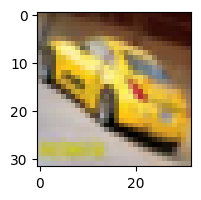

In [ ]:
#plotting the image
plt.figure(figsize=(2,2))
plt.imshow(np_image)
plt.show()

In [ ]:
print(classes[labels[1].item()])

car


In [ ]:
def image_show(image_data):
  np_image=image_data.numpy()
  np_image=np.transpose(np_image,(1,2,0))
  plt.figure(figsize=(2,2))
  plt.imshow(np_image)
  plt.show()

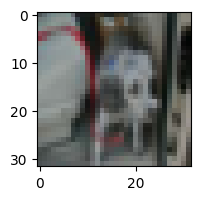

In [ ]:
image_show(images[2])

In [ ]:
classes[labels[2].item()]

'dog'

# **First Convolution Layer**

In [ ]:
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,10,3)
    self.relu=nn.ReLU() #(no. of input channels, number of output channel,kernel size )

    # kernel 3 --> (3,3)

  def forward(self,x):
    y=self.conv1(x)
    y=self.relu(y)
    return y

In [ ]:
cnn=FirstCNN()

In [ ]:
out=cnn(images)

In [ ]:
out.shape

torch.Size([4, 10, 30, 30])

In [ ]:
4: number of images (batch size)
10: channels of output
(30,30) : size of image
defaut
padding=(0,0),stride=(1,1)

In [ ]:
sample=out[0,5,:,:]
sample.shape

torch.Size([30, 30])

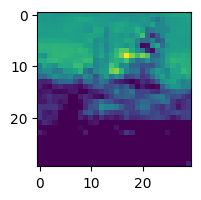

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

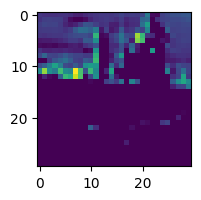

In [ ]:
# 2nd filter
sample=out[0,6,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

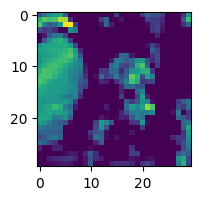

In [ ]:
# 2nd image first filter
sample=out[2,5,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [ ]:
classes[labels[2]]

'dog'

In [ ]:
# padding and stride
# by default: padding=(0,0) and stride=(1,1)
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,10,3,padding=(1,1))

  def forward(self,x):
    y=self.conv1(x)
    return y

In [ ]:
cnn=FirstCNN()

In [ ]:
out=cnn(images)

In [ ]:
out.shape

torch.Size([4, 10, 32, 32])

In [ ]:
# stride=1
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,10,3,padding=(1,1),stride=(1,1))

  def forward(self,x):
    y=self.conv1(x)
    return y

In [ ]:
cnn=FirstCNN()

In [ ]:
out=cnn(images)

In [ ]:
out.shape

torch.Size([4, 10, 32, 32])

In [ ]:
# stride=2
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,10,3,padding=(1,1),stride=(2,2))

  def forward(self,x):
    y=self.conv1(x)
    return y

cnn=FirstCNN()
out=cnn(images)
out.shape

torch.Size([4, 10, 16, 16])

In [ ]:
# stride =2 without padding

class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,10,3,stride=(2,2))

  def forward(self,x):
    y=self.conv1(x)
    return y

cnn=FirstCNN()
out=cnn(images)
out.shape

torch.Size([4, 10, 15, 15])

# **Deep Convolution Network**

In [ ]:
class DeepCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3),
                             nn.Conv2d(10,5,3))

  def forward(self,x):
      y=self.model(x)
      return y

**Intuition of Convolution**
Input=4,3,32,32
1st convolution layer --kernel=3,3 & output channels=10
default padding =0, stride=1
**output as a result of ist convolution**: 4,10,30,30

**Intuition of Convolution:**
Input=4,3,32,32
2st convolution layer --kernel=3,3 & output channels=10
default padding =0, stride=1
**output as a result of 2st convolution**: 4,5,28,28

In [ ]:
deep=DeepCNN()
out=deep(images)
out.shape

torch.Size([4, 5, 28, 28])

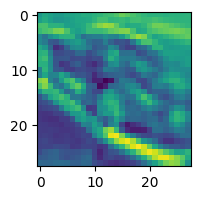

In [ ]:
sample=out[1,4,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [ ]:
classes[labels[1]]

'car'

# **mean pool or average pool**

In [ ]:
class avg_pool(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3),
                             nn.Conv2d(10,5,3),
                             nn.AvgPool2d(2,stride=2))
  def forward(self,x):
      y=self.model(x)
      return y

avg=avg_pool()
out=avg(images)
out.shape

torch.Size([4, 5, 14, 14])

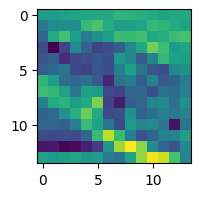

In [ ]:
sample=out[1,3,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [ ]:
classes[labels[1]]

'car'

In [ ]:
# max pool
class max_pool(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(nn.Conv2d(3,10,3),
                             nn.Conv2d(10,5,3),
                             nn.MaxPool2d(2,stride=2))

  def forward(self,x):
    y=self.model(x)
    return y

max_p=max_pool()
out=max_p(images)
out.shape

torch.Size([4, 5, 14, 14])

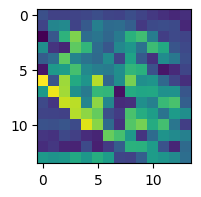

In [ ]:
sample=out[1,3,:,:]
plt.figure(figsize=(2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [ ]:
classes[labels[1]]

'car'

# **LeNet**

In [ ]:
"""
CNN layers:
input=(4,3,32,32)--> batch size =4

in General,
input=(N,3,32,32)--> batch size =N

1st convolution:
(N,3,32,32) --> (N,6,28,28)   #output channels = 6, kernel = 5, stride = 1
Avg Pool:
(N,6,28,28) --> (N,6,14,14)  # Kernel = 2, stride = 2
2nd Convolution:
(N,6,14,14) --> (N,16,10,10) # kernel = 5
Avg Pool:
(N,16,10,10) --> (N,16,5,5) # Stride = 2, kernel = 2

"""

In [ ]:
"""
Dense Layers:
output from CNN Layers --> (N,16,5,5)
Result of flattening --> (N,16*5*5) = (N,400) # N refers to number of images loaded in a batch
Dense Layer 1: 120 Neurons
Dense Layer 2: 84 Neurons
Dense Layer 3: 10 Neurons
"""

In [ ]:
# understanding torch.flatten
x=torch.randn(500,5,10)
x=torch.flatten(x)
x.shape

torch.Size([25000])

In [ ]:
# specifying  dimension in torch.flatten
x=torch.randn(500,5,10)
x=torch.flatten(x,start_dim=1)
x.shape

torch.Size([500, 50])

In [5]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_model=nn.Sequential(nn.Conv2d(3,6,5), # (N,3,32,32)-->(N,6,28,28)
                                  nn.Tanh(),
                                  nn.AvgPool2d(2,stride=2), #(N,6,28,28) -->(N,6,14,14)
                                  nn.Conv2d(6,16,5), # (N,6,14,14) --> (N,16,10,10)
                                  nn.Tanh(),
                                  nn.AvgPool2d(2,stride=2)) #(N,16,10,10) --> (N,16,5,5)

    self.dense_model=nn.Sequential(nn.Linear(400,120),
                                   nn.Tanh(),
                                   nn.Linear(120,84),
                                   nn.Tanh(),
                                   nn.Linear(84,10))
  def forward(self,x):
      y=self.conv_model(x)
      # flatten the result from the conv model
      y=torch.flatten(y,1) # 1--> dimension (N,3,32,32)
      y=self.dense_model(y)
      return y

In [6]:
net=LeNet()
out=net(images)


NameError: name 'images' is not defined

In [ ]:
out.shape

torch.Size([4, 10])

In [ ]:
print(out)

tensor([[-0.0577, -0.0289,  0.0218, -0.0494,  0.1211, -0.0279,  0.1125, -0.1443,
         -0.0878,  0.0678],
        [-0.0635, -0.0397,  0.0261, -0.0594,  0.1051, -0.0269,  0.0982, -0.1336,
         -0.0621,  0.0733],
        [-0.0638, -0.0268,  0.0480, -0.0927,  0.1024, -0.0204,  0.0911, -0.1405,
         -0.0708,  0.0685],
        [-0.0623, -0.0217,  0.0401, -0.0961,  0.1107, -0.0299,  0.1245, -0.1410,
         -0.0916,  0.0661]], grad_fn=<AddmmBackward0>)


In [ ]:
torch.max(out)

tensor(0.1245, grad_fn=<MaxBackward1>)

In [ ]:
# max value across each dimension, parameter --> dim=1
torch.max(out,dim=1)

torch.return_types.max(
values=tensor([0.1211, 0.1051, 0.1024, 0.1245], grad_fn=<MaxBackward0>),
indices=tensor([4, 4, 4, 6]))

In [ ]:
max_values,pred_class=torch.max(out,dim=1)

In [ ]:
print(pred_class)

tensor([4, 4, 4, 6])


# **Train the LeNet**

In [9]:
# define the batch size
batch=256

In [7]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_model=nn.Sequential(nn.Conv2d(3,6,5),
                                   nn.Tanh(),
                                   nn.AvgPool2d(2,stride=2),
                                   nn.Conv2d(6,16,5),
                                   nn.Tanh(),
                                   nn.AvgPool2d(2,stride=2))
    self.dense_model=nn.Sequential(nn.Linear(400,120),
                                   nn.Tanh(),
                                   nn.Linear(120,84),
                                   nn.Tanh(),
                                   nn.Linear(84,10))

  def forward(self,x):
      y=self.conv_model(x)
      # flatten the result from the conv model
      y=torch.flatten(y,1) # 1--> dimension (N,16,5,5)
      y=self.dense_model(y)
      return y


In [10]:
trainset=torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/cifar10',download=True,train=True,
                                    transform=torchvision.transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch,shuffle=True)

testset=torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/cifar10',download=True,train=False,
                                    transform=torchvision.transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testset,batch_size=batch,shuffle=False)

In [11]:
net=LeNet()

In [12]:
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters())

In [13]:
def model_evaluation(dataloader):
  total=0
  correct=0
  for data in dataloader:
    images,labels=data
    out=net(images)
    max_value,pred_class =torch.max(out,1)
    total+=labels.size(0)
    correct+=(pred_class==labels).sum().item()
    accuracy= (100*correct)/total
  return accuracy

In [14]:
total_epochs=20
for i in range (total_epochs):
  for data in  testloader:
    images,labels= data
    optimizer.zero_grad
    out=net(images)
    loss=loss_func(out,labels)
    loss.backward()
    optimizer.step()


  train_acc=model_evaluation(trainloader)
  test_acc=model_evaluation(testloader)

print(f"Epoch {i+1}/{total_epochs}, Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")



Epoch 20/20, Train Accuracy: 10.00%, Test Accuracy: 10.00%
